In [51]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [54]:

def load_data(file):
    df = pd.read_csv(file)
    df = df.replace("?", np.nan)
    df = df.fillna(df.median()).astype(str)
    feature_names = df.columns.to_list()
    X, Y = df.iloc[:, :-1], df.iloc[:, -1]

    return X, Y, feature_names


def val_acc(model: tree.DecisionTreeClassifier):
    X, Y, _ = load_data("bvalidate.csv")
    n = Y.shape[0]
    correct = (model.predict(X) == Y).sum()
    print(f"Validation accuracy: {(correct / n * 100):.2f}%")


def main():
    X, Y, feature_names = load_data("btrain.csv")

    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf = clf.fit(X, Y)
    val_acc(clf)

    plt.figure(figsize=(40, 20))
    tree.plot_tree(clf, feature_names=feature_names)


Validation accuracy: 82.20%


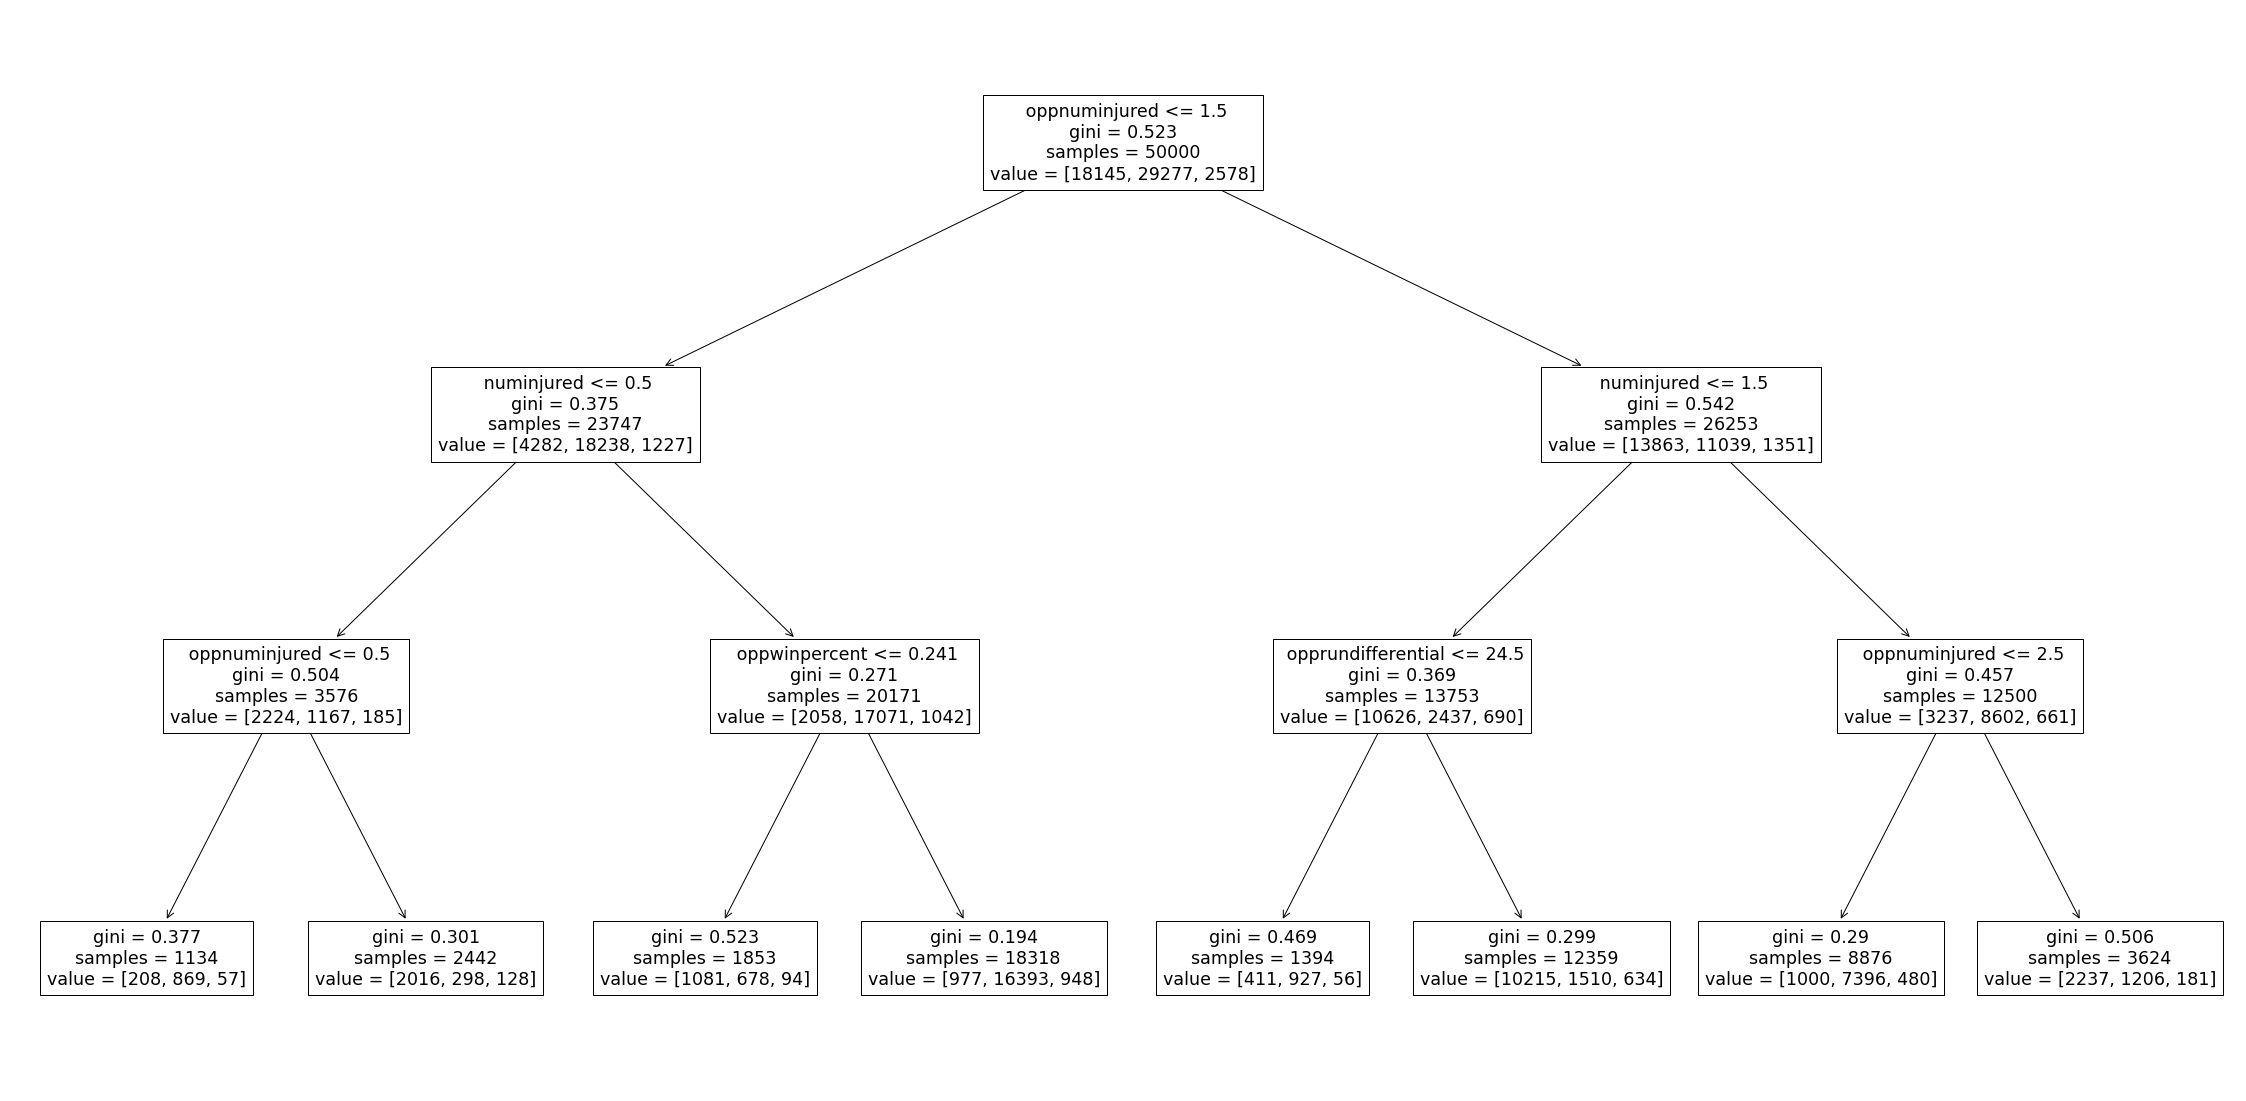

In [55]:
main()